In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('a10.csv', 
                 parse_dates=['date'], 
                 index_col = 'date',
                 infer_datetime_format=True)


In [3]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


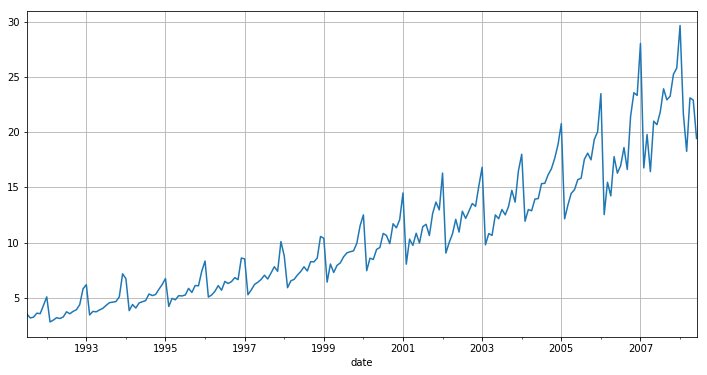

In [4]:
plt.figure(figsize=(12,6))
df['value'].plot()
plt.grid()

In [5]:
df['1991']

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371


In [ ]:
df['2007-02':'2008-01'].plot(kind='bar')

## Exercising Period

In [ ]:
y=pd.Period('2016')
dir(y)

In [ ]:
y.start_time

In [ ]:
y.end_time

In [ ]:
m=pd.Period('2016-01',freq ='M')
m

In [ ]:
m.start_time, m.end_time

In [ ]:
m+1

In [ ]:
d=pd.Period('2016-01-01 23:00:00',freq ='H')
d

In [ ]:
d.is_leap_year

In [ ]:
d.days_in_month

In [ ]:
dir(d)

In [ ]:
q = pd.Period('2019', freq = 'Q')

In [ ]:
q = pd.Period('2019', freq = 'Q')
q.start_time, q.end_time

In [ ]:
q = pd.Period('2019', freq = 'Q-JAN')
q.start_time, q.end_time

In [ ]:
q = pd.Period('2019', freq = 'Q-NOV')
q.start_time, q.end_time

In [ ]:
q.asfreq('M', how = 'start')

In [ ]:
q.asfreq('M', how = 'end')

In [ ]:
## Period Range

In [ ]:
import numpy as np

In [ ]:
start_year = '2019-01'
end_year = '2020-12'
offset_val = 2

idx = pd.period_range(start_year,end_year, freq='M')

vals = np.array([15*np.random.random_sample(1)+
                 offset_val
                 +x-1 for x in range(len(idx))]).squeeze()
vals

In [ ]:
vals = np.random.rand(len(idx))
vals

In [ ]:
start_year = '2019-01'
end_year = '2020-12'

idx = pd.period_range(start_year,end_year, freq='M')

vals = np.array([15*np.random.random_sample(1)+
                 offset_val
                 +x-1 for x in range(len(idx))]).squeeze()

ts = pd.Series(data=vals, index=idx)
plt.figure(figsize=(12,8))
ts.plot()
plt.grid()

In [ ]:
ts['2019'].plot()

In [ ]:
ts['2020'].plot()

In [ ]:
ts.plot()

In [ ]:
ts.index

In [ ]:
tst = ts.to_timestamp()

In [ ]:
tst.index

In [ ]:
tst.plot()

## Resampling

In [ ]:
def plot_resampled(df, resample_rule):
    plt.figure(figsize=(8,4))
    df_resampled = df.resample(resample_rule).sum()
    sns.lineplot(x=df_resampled.index, y=df_resampled['value'])
    plt.grid()

In [ ]:
resampled = df.resample('10D').sum()
resampled.head()

In [ ]:
sns.lineplot(x=resampled.index, y=resampled['value'])
plt.grid()

In [ ]:
plot_resampled(df, '10D')

In [ ]:
plot_resampled(df, '6M')

In [ ]:
from pytz import all_timezones

In [ ]:
all_timezones

In [ ]:
## Shifting and Lagging

In [ ]:
df.shift(1)[0:5]

In [ ]:
df.shift(5)[0:10]

In [ ]:
df.shift(-5)[-10:-1]

In [ ]:
df['value previous day']=df['value'].shift(1)

In [ ]:
df.head()

In [ ]:
df['1 day change']=df['value']-df['value previous day']

In [ ]:
df.head()

In [ ]:
df.index

In [ ]:
## Shift 1 day 
df.tshift(1)[0:5]

In [ ]:
## Shift 5 day 
df.tshift(5)[0:5]

## Exercises

In [ ]:
# Import as Dataframe
df = pd.read_csv('a10.csv', 
                 parse_dates=['date'],
                 index_col = 'date')
df.head()

In [ ]:
df.index

In [ ]:
plt.figure(figsize=(16,5))
df.value.plot()
plt.grid()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

In [ ]:
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

In [ ]:
result_mul.plot()

In [ ]:
result_add.plot()

In [ ]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

In [ ]:
result_mul.seasonal.plot()

In [ ]:
result_mul.trend

In [ ]:
result_mul.trend.plot()

In [ ]:
result_mul.resid

## Test for Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller, kpss

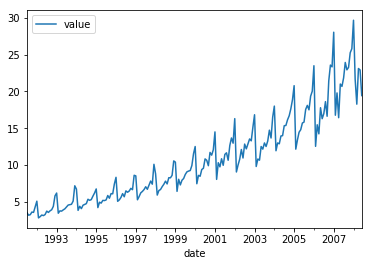

In [7]:
df.plot()

In [8]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930674
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [9]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/rsilvei/Envs/bayesian/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/rsilvei/Envs/bayesian/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
(result_add.trend+result_add.resid).plot()

In [ ]:
(result_add.seasonal+result_add.resid).plot()

## Test for Seasonality - Autocorrelation and Partial Correlation

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
plt.figure(figsize=(14,5))
autocorrelation_plot(df.value)

## Time Series Forecast w/ LSTM in PyTorch

In [16]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
plt.figure(figsize=(14,5))
training_set = df.value
training_set.plot()
plt.grid()

In [ ]:
training_set.values.reshape(-1,1)

In [ ]:
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set.values.reshape(-1,1))

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(training_data.squeeze())
plt.grid()

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [ ]:
seq_length = 10
x, y = sliding_windows(training_data, seq_length)

In [ ]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

full_x = torch.Tensor(np.array(x))
full_y = torch.Tensor(np.array(y))

train_x = torch.Tensor(x[0:train_size])
train_y = torch.Tensor(y[0:train_size])

test_x = torch.Tensor(x[train_size:len(x)])
test_y = torch.Tensor(y[train_size:len(y)])

In [ ]:
class TimePredictor(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(TimePredictor, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, 
                            hidden_size=hidden_size,
                            num_layers=num_layers, 
                            batch_first=True)
        
        self.out = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.out(h_out)
        return out

In [ ]:
lr = 0.001

input_size = 1
hidden_size = 5
num_layers = 1
num_classes = 1

model = TimePredictor(num_classes, 
                      input_size, 
                      hidden_size, 
                      num_layers)

In [ ]:
criterion = torch.nn.MSELoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
num_epochs = 5000
for epoch in range(num_epochs):
    outputs = model(train_x)
    optimizer.zero_grad()
    loss = criterion(outputs, train_y)
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

In [ ]:
model.eval()
predictions = model(full_x).detach().numpy()
plt.figure(figsize=(14,5))
plt.plot(sc.inverse_transform(predictions), 'r', label='Predictions')
plt.axvline(x=train_size, c='r', linestyle='--')
plt.plot(sc.inverse_transform(full_y), 'g', label='True Value')
plt.grid()
plt.legend()

In [ ]:
def train_model(seq_length, lr, num_epochs):
    x, y = sliding_windows(training_data, seq_length)
    train_size = int(len(y) * 0.67)
    test_size = len(y) - train_size
    train_x = torch.Tensor(x[0:train_size])
    train_y = torch.Tensor(y[0:train_size])
    test_x = torch.Tensor(x[train_size:len(x)])
    test_y = torch.Tensor(y[train_size:len(y)])
    
    ## Model
    input_size = 1
    hidden_size = 5
    num_layers = 1
    num_classes = 1
    trained_model = TimePredictor(num_classes, 
                          input_size, 
                          hidden_size, 
                          num_layers)
    
    criterion = torch.nn.MSELoss()   
    optimizer = torch.optim.Adam(trained_model.parameters(), lr=lr)
    trained_model.train()
    for epoch in range(num_epochs):
        outputs = trained_model(train_x)
        optimizer.zero_grad()
        loss = criterion(outputs, train_y)
        loss.backward()
        optimizer.step()
        if epoch % 1000 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
    print("-"*50)
    return trained_model

In [ ]:
lengths = [2,4,8,10,12] 
model = [train_model(seq_length=l, lr=0.0001, num_epochs=5000) for l in lengths]

In [ ]:
[model[x].eval for x in range(len(model))]

plt.figure(figsize=(14,5))
plt.plot(sc.inverse_transform(model[0](full_x).detach().numpy()), color="C0", label='Preds - 1')
plt.plot(sc.inverse_transform(model[1](full_x).detach().numpy()), color="C1", label='Preds - 2')
plt.plot(sc.inverse_transform(model[2](full_x).detach().numpy()), color="C2", label='Preds - 3')
plt.plot(sc.inverse_transform(model[3](full_x).detach().numpy()), color="C3", label='Preds - 4')
plt.plot(sc.inverse_transform(model[4](full_x).detach().numpy()), color="C4", label='Preds - 5')

plt.axvline(x=train_size, c='r', linestyle='--')
plt.plot(sc.inverse_transform(full_y), 'g', label='True Value')
plt.grid()
plt.legend()

## Time Series Forecasting w/ ARIMA

## Forecasting with Sktime

In [12]:
import numpy as np
import sktime
from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
sktime.__version__

'0.4.0'

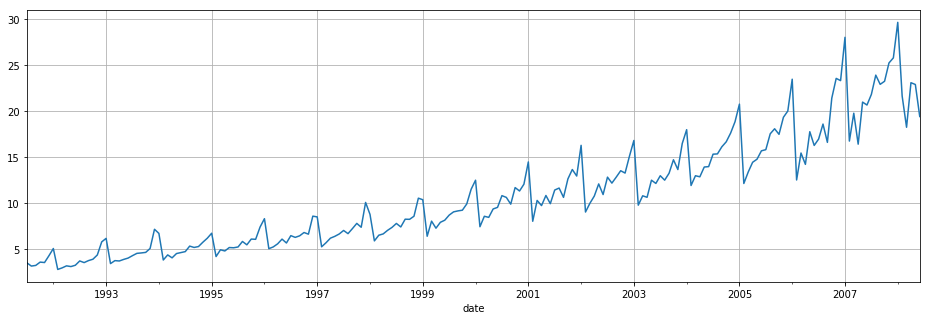

In [17]:
# Import as Dataframe
df = pd.read_csv('a10.csv', 
                 parse_dates=['date'],
                 index_col = 'date')
plt.figure(figsize=(16,5))
df.value.plot()
plt.grid()

In [30]:
y = pd.Series(data=df.value.values)
y

0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Length: 204, dtype: float64

In [66]:
y_train, y_test = temporal_train_test_split(y, test_size=20)
y_test.index[0]

184

In [73]:
num_forecast_points = len(y_test) + 50
fh = np.arange(1, num_forecast_points)  # forecasting horizon
f_12 = ThetaForecaster(sp=12)  # monthly seasonal periodicity
f_12.fit(y_train)

f_1 = ThetaForecaster()  # monthly seasonal periodicity
f_1.fit(y_train)

f_5 = ThetaForecaster(sp=5)  # monthly seasonal periodicity
f_5.fit(y_train)

f_30 = ThetaForecaster(sp=30)  # monthly seasonal periodicity
f_30.fit(y_train)

ThetaForecaster(sp=30)

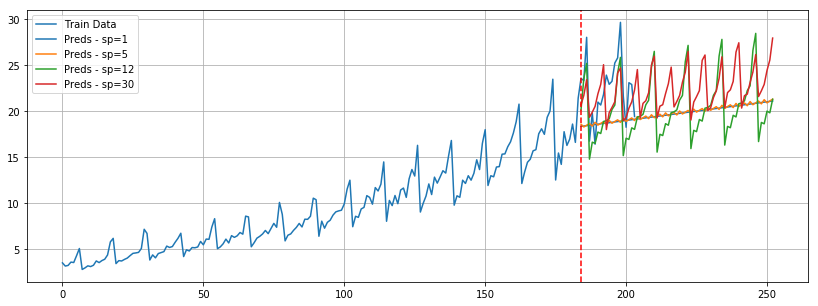

In [80]:
plt.figure(figsize=(14,5))
plt.plot(y, color="C0", label='Train Data')

plt.plot(f_1.predict(fh), color="C0", label='Preds - sp=1')
plt.plot(f_5.predict(fh), color="C1", label='Preds - sp=5')
plt.plot(f_12.predict(fh), color="C2", label='Preds - sp=12')
plt.plot(f_30.predict(fh), color="C3", label='Preds - sp=30')

plt.grid()
plt.axvline(x=y_test.index[0], c='r', linestyle='--')
plt.legend()

## References


1. https://www.machinelearningplus.com/time-series/time-series-analysis-python/  
2. https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4  
3. https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/  
4. https://github.com/spdin/time-series-prediction-lstm-pytorch/blob/master/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb  
5. [sktime](https://github.com/alan-turing-institute/sktime/blob/master/examples/01_forecasting.ipynb)  